In [113]:
import pandas as pd
#Articles on the same dataset
#https://ubc-mds.github.io/dsci_522_group_8_bank_marketing_project/bank_analysis.html
#https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis
#https://medium.com/@utkarshsatishkumar.shah/bank-marketing-predictive-analysis-a-deep-dive-using-crisp-dm-3d29657b2310
  
#!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
#!unzip -oq bank-additional.zip

#from hint https://colab.research.google.com/drive/1wtGA9H5n2G6jCi3mEu4OgNRWifJ86cag?usp=sharing
data = pd.read_csv('bank-additional/bank-additional.csv', sep=";")

#This should be dropped as it heavily skews the data as advised in the names.txt file
data = data.drop("duration", axis=1)
#I dont think this is super relevant - Kept month as it could be an indicator for months where specific campaigns or marketing pushes were going on
data= data.drop("day_of_week", axis=1)
#Ensuring any incomplete rows are dropped
data.dropna()

data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [115]:
from pycaret.classification import *
#normalization using z-score
#ref https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb#scrollTo=16641cab 
#ref https://pycaret.gitbook.io/docs/get-started/preprocessing/scale-and-transform
s = setup(data, target = 'y', session_id = 123, normalize = True)





,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(4119, 19)"
5,Transformed data shape,"(4119, 57)"
6,Transformed train set shape,"(2883, 57)"
7,Transformed test set shape,"(1236, 57)"
8,Numeric features,9
9,Categorical features,9


In [116]:
#Best model ordered by accuracy
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9036,0.7687,0.9036,0.8865,0.8829,0.3160,0.3621,0.0210
lr,Logistic Regression,0.9015,0.7641,0.9015,0.8839,0.8829,0.3218,0.3606,0.2810
knn,K Neighbors Classifier,0.9015,0.7101,0.9015,0.8835,0.8845,0.3366,0.3681,0.0250
rf,Random Forest Classifier,0.9001,0.7679,0.9001,0.8832,0.8857,0.3512,0.3754,0.0470
gbc,Gradient Boosting Classifier,0.8994,0.7765,0.8994,0.8821,0.8847,0.3450,0.3697,0.0520
ada,Ada Boost Classifier,0.8987,0.7472,0.8987,0.8802,0.8844,0.3454,0.3652,0.0270
lda,Linear Discriminant Analysis,0.8970,0.7686,0.8970,0.8910,0.8932,0.4350,0.4382,0.0190
et,Extra Trees Classifier,0.8942,0.7534,0.8942,0.8789,0.8834,0.3537,0.3664,0.0460
lightgbm,Light Gradient Boosting Machine,0.8932,0.7566,0.8932,0.8731,0.8779,0.3074,0.3278,0.4680
dummy,Dummy Classifier,0.8904,0.5000,0.8904,0.7928,0.8388,0.0000,0.0000,0.0150


In [117]:
#Ridge confirmed to be the best Model for accuracy and recall
#best variable becomes Ridge and can be reused further down.
#https://www.geeksforgeeks.org/python/ridge-classifier/ Understanding Ridge

In [118]:
#trying to tune the model, but results did not improve
#ref for understanding tuning https://medium.com/@atalarifqy/optimizing-machine-learning-workflows-with-pycaret-e0b19d8caf2c
tuned_ridge = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9135,0.8147,0.9135,0.9025,0.9035,0.4657,0.4848
1,0.9273,0.8542,0.9273,0.9270,0.9133,0.5014,0.5618
2,0.8927,0.7031,0.8927,0.8665,0.8686,0.2358,0.2756
3,0.8854,0.6870,0.8854,0.8435,0.8541,0.1148,0.1458
4,0.9062,0.7711,0.9062,0.8899,0.8900,0.3569,0.3904
5,0.8924,0.7935,0.8924,0.8707,0.8767,0.2883,0.3070
6,0.9167,0.7970,0.9167,0.9070,0.9010,0.4175,0.4641
7,0.9028,0.7640,0.9028,0.8964,0.8719,0.2364,0.3352
8,0.9062,0.7361,0.9062,0.8957,0.8820,0.3077,0.3810


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


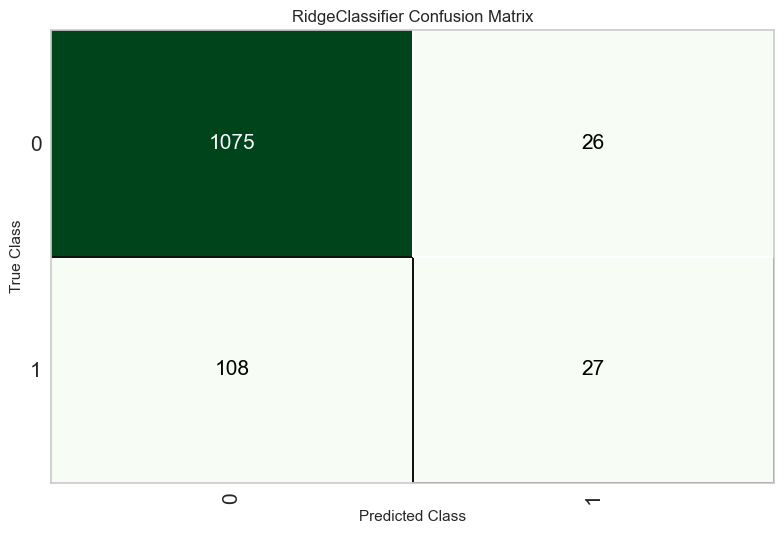

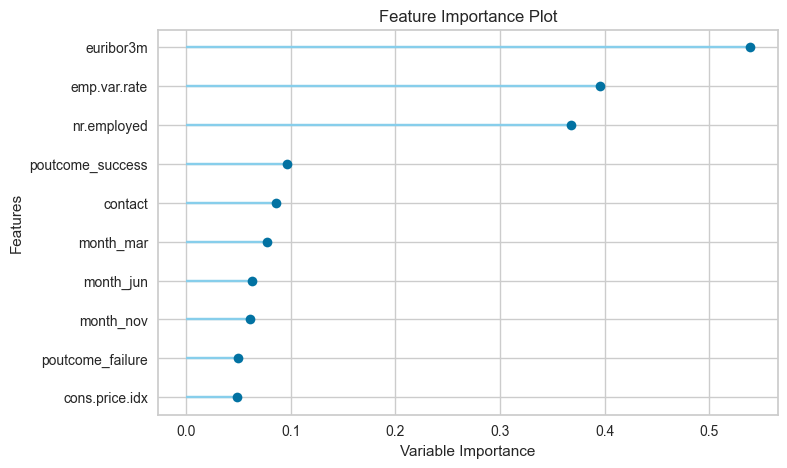

In [120]:
#since we concluded that tuning did not improve the model, I will continue to use it directly
#https://www.investopedia.com/terms/e/euribor.asp
plot_model(best, plot = 'confusion_matrix')
plot_model(best, plot = 'feature')

In [121]:
#https://pycaret.readthedocs.io/en/stable/api/classification.html#pycaret.classification.predict_model results on the test data
holdout_pred = predict_model(best)
holdout_pred.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8916,0,0.8916,0.8651,0.8699,0.2405,0.2716


,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prediction_label
2189,56,management,divorced,university.degree,no,no,no,cellular,nov,3,999,0,nonexistent,-0.1,93.199997,-42.000000,4.120,5195.799805,no,no
1801,66,housemaid,married,high.school,no,yes,no,cellular,may,1,999,0,nonexistent,-1.8,92.892998,-46.200001,1.259,5099.100098,no,no
216,43,management,married,university.degree,unknown,yes,yes,cellular,apr,1,999,0,nonexistent,-1.8,93.074997,-47.099998,1.405,5099.100098,no,no
440,49,management,married,university.degree,no,no,no,cellular,jul,3,999,0,nonexistent,1.4,93.917999,-42.700001,4.962,5228.100098,no,no
3037,80,retired,divorced,high.school,no,yes,no,cellular,oct,1,999,0,nonexistent,-3.4,92.431000,-26.900000,0.722,5017.500000,yes,no


In [122]:
lda = create_model("lda")

tuned_lda = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8962,0.8154,0.8962,0.8991,0.8976,0.4869,0.4872
1,0.9204,0.8541,0.9204,0.9174,0.9187,0.5786,0.5795
2,0.8858,0.7036,0.8858,0.8781,0.8815,0.3776,0.3793
3,0.8889,0.6888,0.8889,0.8734,0.8793,0.3260,0.3335
4,0.9028,0.7717,0.9028,0.9028,0.9028,0.4939,0.4939
5,0.8889,0.7930,0.8889,0.8889,0.8889,0.4216,0.4216
6,0.9132,0.7970,0.9132,0.9024,0.9047,0.4646,0.4781
7,0.8819,0.7642,0.8819,0.8723,0.8765,0.3489,0.3513
8,0.8993,0.7351,0.8993,0.8903,0.8938,0.4363,0.4404


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9066,0.8230,0.9066,0.9006,0.9031,0.4908,0.4930
1,0.9273,0.8481,0.9273,0.9205,0.9206,0.5657,0.5809
2,0.8824,0.7250,0.8824,0.8597,0.8674,0.2611,0.2741
3,0.8993,0.6910,0.8993,0.8807,0.8847,0.3342,0.3560
4,0.9028,0.7802,0.9028,0.8950,0.8981,0.4468,0.4500
5,0.8854,0.7910,0.8854,0.8741,0.8789,0.3378,0.3412
6,0.9097,0.8150,0.9097,0.8973,0.8999,0.4337,0.4493
7,0.8854,0.7477,0.8854,0.8655,0.8722,0.2945,0.3066
8,0.9097,0.7697,0.9097,0.8981,0.9003,0.4533,0.4684


Fitting 10 folds for each of 10 candidates, totalling 100 fits


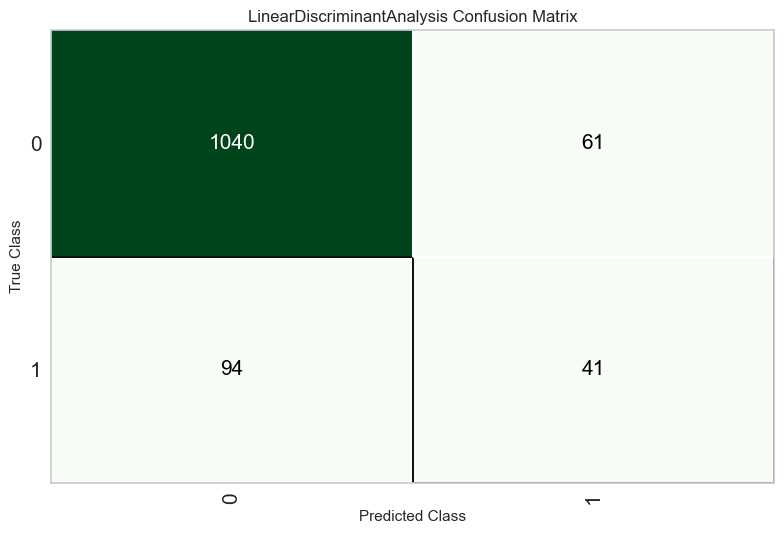

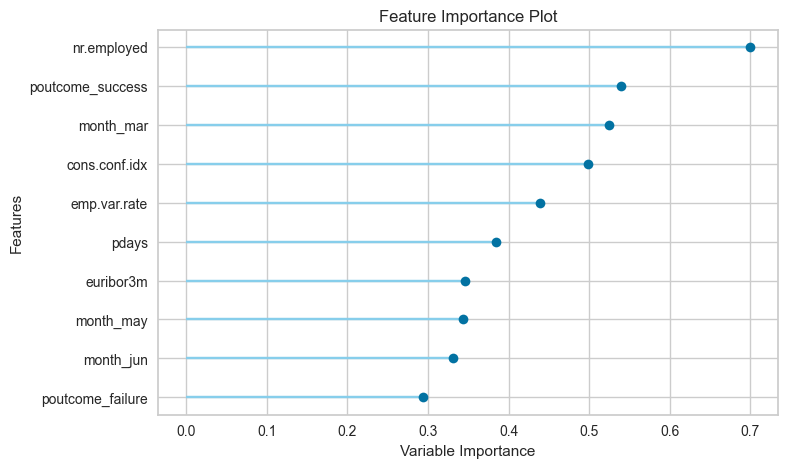

In [123]:
plot_model(tuned_lda, plot = 'confusion_matrix')
plot_model(tuned_lda, plot = 'feature')

In [132]:
holdout_pred = predict_model(tuned_lda)
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8746,0.7485,0.8746,0.8608,0.8668,0.2781,0.2815


,age,job,marital,education,default,housing,loan,contact,month,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prediction_label,prediction_score
2189,56,management,divorced,university.degree,no,no,no,cellular,nov,3,...,0,nonexistent,-0.1,93.199997,-42.000000,4.120,5195.799805,no,no,0.9893
1801,66,housemaid,married,high.school,no,yes,no,cellular,may,1,...,0,nonexistent,-1.8,92.892998,-46.200001,1.259,5099.100098,no,no,0.9470
216,43,management,married,university.degree,unknown,yes,yes,cellular,apr,1,...,0,nonexistent,-1.8,93.074997,-47.099998,1.405,5099.100098,no,no,0.9612
440,49,management,married,university.degree,no,no,no,cellular,jul,3,...,0,nonexistent,1.4,93.917999,-42.700001,4.962,5228.100098,no,no,0.9868
3037,80,retired,divorced,high.school,no,yes,no,cellular,oct,1,...,0,nonexistent,-3.4,92.431000,-26.900000,0.722,5017.500000,yes,yes,0.9199
